In [1]:
#!/afs/inf.ed.ac.uk/user/s14/s1413557/miniconda2/bin/python

from __future__ import print_function #ffs

from f4klib2 import *

from scipy import ndimage as ndi


In [2]:
movs = loadMovids()
ids, pickables = loadPickables(movs) #Movid having reference in F4K csv

Loading data took: 0:00:00.509453
Using video_id: 000091a58183e0358d5c3f8716c8491a#201101151720
Using movie, csv, sql paths: 
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/summaries/0/00/summary_000091a58183e0358d5c3f8716c8491a#201101151720.avi
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/summaries/0/00/frame_info_000091a58183e0358d5c3f8716c8491a#201101151720.txt
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/sqldump/0/00/000091a58183e0358d5c3f8716c8491a#201101151720.txt
Video fps: 25.0, duration 188.64
Video frame size: 320x240, camera_id: 37
Total frames in video: 4716
4716 out of 4716, about 100% detection have a bounding box in sql.
613 out of 4716 total detection is rejected by FEIF, 4103 kept. Reject rate: 13%
FEIF Runtime: 0:00:00.651869
5 out of 10 images is rejected, 5 kept. Reject rate: 50%


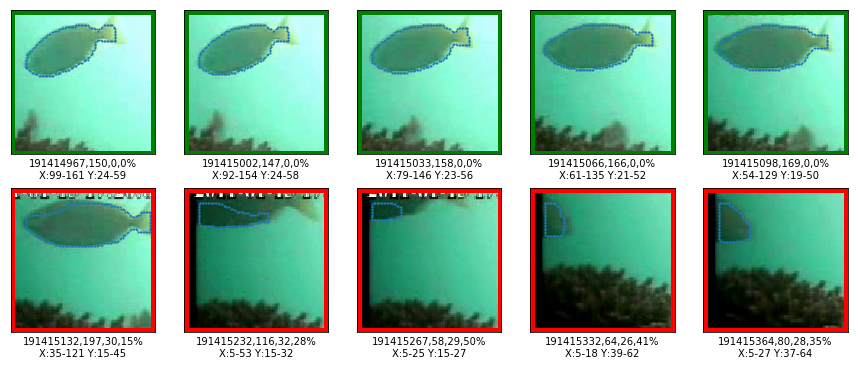

In [3]:
# 6 200-220: Broken contX, FEIF bugs
# 6 300-400: Ghost Fish?
# 7 severe no contour problem. 356/365 missing
# 31 No detection
# 41 Ghost Fish
# 56 No timestamp
# 77 Ghost Fish, broken contour
# 132 100% no contour
picker = 6
startframe = 100
endframe = 110
movid = movs[picker]
info, clip, hasContour, contour, fish_id, frames = loadVideo(movid,print_image=True,
                                                    print_info=True,
                                                    print_time=True,
                                                    limit_offset=startframe,
                                                    limit_amount=endframe,
                                                    classify=True)

In [4]:
picker = 6
#picker2 = 177
movid = movs[picker]
info, clip, hasContour, contour, fish_id, frames = loadVideo(movid,print_info=True, print_image=False)
#plotContourOnImage(info, clip, hasContour, contour, picker2, debug=True)

Using video_id: 000091a58183e0358d5c3f8716c8491a#201101151720
Using movie, csv, sql paths: 
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/summaries/0/00/summary_000091a58183e0358d5c3f8716c8491a#201101151720.avi
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/summaries/0/00/frame_info_000091a58183e0358d5c3f8716c8491a#201101151720.txt
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/sqldump/0/00/000091a58183e0358d5c3f8716c8491a#201101151720.txt
Video fps: 25.0, duration 188.64
Video frame size: 320x240, camera_id: 37
Total frames in video: 4716
4716 out of 4716, about 100% detection have a bounding box in sql.


In [5]:
matt_features = getMattFeatures(info, clip, hasContour, contour, fish_id, print_info=True, ret_normalized_erraticity=False)

Calculate 4716 feature took total of 0:01:32.663594
0 out of 4716 feature not calculated


In [6]:
print(matt_features.shape)

(4716, 29)


# Testing Algs Output
---

In [7]:
# STOP!
raise Exception('The code is too fabulous.')

Exception: The code is too fabulous.

In [190]:
#Placeholder tookit
time = datetime.now()
print("Took total of {0}".format(datetime.now() - time))
time = datetime.now()

Took total of 0:00:00.000155


In [191]:
I = np.array([[1,2,3],[4,5,6],[7,8,9]])
coffeve = np.array([[1,2],[3,4]])
print("Matlab Result")
print(np.rot90(signal.convolve2d(np.rot90(I, 2), np.rot90(coffeve, 2), mode='same'),2))
print("sk-image Result")
print(ndi.convolve(I, coffeve, mode='constant', cval=0.0))

Matlab Result
[[23 33 24]
 [53 63 42]
 [52 59 36]]
sk-image Result
[[23 33 24]
 [53 63 42]
 [52 59 36]]


In [8]:
time = datetime.now()
for picker in range(frames):
    if hasContour[picker]:
        image1 = clip[picker]
        thiscontour = getContour(contour[picker])
        mask = np.full(image1.shape, 0, dtype=np.uint8)
        cv2.fillPoly(mask, np.array([thiscontour], dtype=np.int32), (255,)*3)
        image2 = cv2.cvtColor(image1,cv2.COLOR_RGB2YUV)
        image3 = normalizeRGB(image2)[:,:,0]
        image4 = cv2.bitwise_or(cv2.bitwise_not(mask),image1)
        image5 = cv2.cvtColor(image4,cv2.COLOR_RGB2YUV)
        image6 = normalizeRGB(image5)[:,:,0]
        image7 = cv2.bitwise_and(mask,image1)
        image8 = cv2.cvtColor(image7,cv2.COLOR_RGB2YUV)
        image9 = normalizeRGB(image8)[:,:,0]
    print("Image {1} took total of {0}".format(datetime.now() - time,picker+1),end='\r')
print("Took total of {0}              ".format(datetime.now() - time))

Took total of 0:00:06.751748              


In [221]:
scale = 2.75
theta = 90
sigma_x = scale / np.pi * np.sqrt(np.log(2)/2) * 3 #(2^bandwidth+1)/(2^bandwidth-1); bdw=1;
sigma_y = sigma_x/ 0.5 #gamma

f = 1.0 / scale
Sx = int(np.ceil(sigma_x))
Sy = int(np.ceil(sigma_y))
G_real = np.zeros((2*Sx+1,2*Sy+1))
G_imag = np.zeros((2*Sx+1,2*Sy+1))
for x in np.arange(-Sx,Sx+1):
    for y in np.arange(-Sy,Sy+1):
        xPrime = x * np.cos(theta) + y * np.sin(theta)
        yPrime = y * np.cos(theta) - x * np.sin(theta)
        ex = np.exp(-0.5*((xPrime/sigma_x)**2+(yPrime/sigma_y)**2))
        G_real[Sx+x,Sy+y] = ex * np.cos(2*np.pi*f*xPrime)
        G_imag[Sx+x,Sy+y] = ex * np.sin(2*np.pi*f*xPrime)
wNorm = np.sqrt(np.sum(G_real**2+G_imag**2))
G_realz = G_real / wNorm
G_imagz = G_imag / wNorm

picker = 177

thiscontour = getContour(contour[picker])
I = np.full((100,100), 0, dtype=np.uint8)
cv2.fillPoly(I, np.array([thiscontour], dtype=np.int32), (255,))

time  = datetime.now()
for i in range(500):
#     Imgabout = np.rot90(signal.convolve2d(np.rot90(I, 2), np.rot90(G_imagz, 2), mode='same'),2)
#     Regabout = np.rot90(signal.convolve2d(np.rot90(I, 2), np.rot90(G_realz, 2), mode='same'),2)
    Imgabout = ndi.convolve(I, G_realz, mode='constant', cval=0.0,  output=np.float64)
    Regabout = ndi.convolve(I, G_imagz, mode='constant', cval=0.0,  output=np.float64)
print("Took total of {0}".format(datetime.now() - time))

time = datetime.now()
for i in range(500):
    Imgabout = ndi.convolve(I, G_realz, mode='constant', cval=0.0,  output=np.float64)
    Regabout = ndi.convolve(I, G_imagz, mode='constant', cval=0.0,  output=np.float64)
    gabout = np.sqrt(Imgabout**2+Regabout**2)
    targs = gabout[I>=1]
    targs[targs<0] = 0
    targs[targs>255] = 255
    targs = targs.astype(np.uint8)
    gabor_histo = np.histogram(targs,np.arange(0,257))[0] #np.histogram things
    gab_mean = np.dot(np.arange(0,256),gabor_histo) / sum(gabor_histo)
    gabor_std = np.dot((np.arange(0,256)-gab_mean)**2,gabor_histo) / sum(gabor_histo)
print("Took total of {0}".format(datetime.now() - time))


Took total of 0:00:01.171414
Took total of 0:00:01.283512


In [216]:
W = 4
t = np.arange(-4,5).astype(float)
G = np.exp(-(np.multiply(t,t)/2))/(2* np.pi)
G = G / np.sum(G)
X = np.arange(1,201)
Y = np.arange(201,401)
X1 = np.hstack((X[-W:],X,X[:W]))
Y1 = np.hstack((Y[-W:],Y,Y[:W]))
XX = np.convolve(X1,G,'same')
YY = np.convolve(Y1,G,'same')
Xu = np.gradient(XX)
Yu = np.gradient(YY)
Xuu = np.gradient(Xu)
Yuu = np.gradient(Yu)
k = (((Xu*Yuu)-(Xuu*Yu))/(((Xu**2)+(Yu**2))**1.5))[W:-W]
L2 = len(k)
NFFT = 1<<(len(k)-1).bit_length()
FT = np.fft.fft(k, NFFT) / L2
f = L2 / 2*np.linspace(0, 1, NFFT/2 + 1)
Yfreq = 2*np.abs(FT[0:NFFT/2+1])
lag = 10
if len(Yfreq) < lag:
    lag = 1
#No moving average?
y_avg = np.convolve(Yfreq, np.ones(lag)/float(lag), 'same')[lag-1:]
scaled = np.convolve(np.add.reduceat(y_avg, np.arange(0, len(y_avg), 4)),[1,1],'valid')

print(stats.skew(scaled))
print(stats.kurtosis(scaled))
print(y_avg)

-0.315177275507
-0.619683734612
[  3.05918105e-07   3.04345352e-07   2.81820531e-07   2.71065775e-07
   2.98501890e-07   3.07615542e-07   2.94124246e-07   2.64476074e-07
   2.84781049e-07   3.03519336e-07   3.00440527e-07   2.77067465e-07
   2.69548540e-07   2.95798109e-07   3.03355216e-07   2.88707971e-07
   2.58874294e-07   2.81897774e-07   2.99140749e-07   2.94685671e-07
   2.70734955e-07   2.66266230e-07   2.91186607e-07   2.97249051e-07
   2.81681177e-07   2.51952987e-07   2.77285299e-07   2.93023307e-07
   2.87377816e-07   2.63137573e-07   2.61417403e-07   2.84928120e-07
   2.89621147e-07   2.73400725e-07   2.45253428e-07   2.72408145e-07
   2.86698388e-07   2.80094363e-07   2.55854814e-07   2.56481951e-07
   2.78568879e-07   2.82074255e-07   2.65487706e-07   2.40019317e-07
   2.67260967e-07   2.80224271e-07   2.72927071e-07   2.48964981e-07
   2.51460363e-07   2.72176288e-07   2.74722393e-07   2.58059068e-07
   2.34876912e-07   2.60796909e-07   2.72611051e-07   2.64905174e-07
  

# Testing Outputs Stats
---

In [40]:
def secToTime(seconds, mode = "full"):
    days = int(seconds // 86400)
    seconds = seconds % 86400
    hours = int(seconds // 3600)
    seconds = seconds % 3600
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    if mode == "hour":
        return " {0} Hours".format(24*days+hours)
    return " {0} Days {1} Hours {2} Minute {3} Seconds".format(days,hours,minutes,seconds)

In [59]:
total_features = 839000000
feif_reduction_rate = 0.33552
videos = 396901

qiqi_time_find_track = 19.2
qiqi_time_extraction = 110.1 
qiqi_time_image_preprocess = 70.0
qiqi_total = qiqi_time_find_track + qiqi_time_extraction + qiqi_time_image_preprocess
qiqi_core_used = 32 #32 out of 40
qiqi_core_used_minimal = 8 #If core is poorly utilized
qiqi_feature_used = 961
qiqi_videos = 455993

my_time_find_track = 0.509453
my_time_extraction = 37 * 60 + 22.1
my_time_image_preprocess = 6.751748
my_total = my_time_find_track + my_time_extraction + my_time_image_preprocess
my_core_used = 1
my_core_used_maximal = 2
my_feature_used = 4716
my_feature_used_actual = 4103

used_total = qiqi_total
used_total2 = my_total

print("Qiqi's calculated runtime using original code (32 core):")
print(secToTime(used_total*qiqi_videos, mode="hour"))
print(secToTime(used_total*qiqi_videos))

print("\nQiqi's calculated runtime using original code (32 core) (corrected total):")
print(secToTime(used_total/qiqi_feature_used*total_features, mode="hour"))
print(secToTime(used_total/qiqi_feature_used*total_features))

print("\nSingle-core Runtime using original code:")
print(secToTime(used_total*qiqi_core_used/qiqi_feature_used*total_features, mode="hour"))
print(secToTime(used_total*qiqi_core_used/qiqi_feature_used*total_features))

print("\n300-core Runtime using original code:")
print(secToTime(used_total*qiqi_core_used/300/qiqi_feature_used*total_features, mode="hour"))
print(secToTime(used_total*qiqi_core_used/300/qiqi_feature_used*total_features))

print("\nMy calculated runtime (1 process, uses about 4*40% = 1.6 core):")
print(secToTime(used_total2/my_feature_used*total_features, mode="hour"))
print(secToTime(used_total2/my_feature_used*total_features))

print("\nMy calculated runtime (reduced with FEIF):")
print(secToTime(used_total2/my_feature_used_actual*total_features*feif_reduction_rate, mode="hour"))
print(secToTime(used_total2/my_feature_used_actual*total_features*feif_reduction_rate))

print("\n300-core runtime using my code:")
print(secToTime(used_total2/300*my_core_used/my_feature_used_actual*total_features*feif_reduction_rate, mode="hour"))
print(secToTime(used_total2/300*my_core_used/my_feature_used_actual*total_features*feif_reduction_rate))

print("\n300-core runtime using my code (worst-case: 2 process per machine):")
print(secToTime(used_total2/300*my_core_used_maximal/my_feature_used_actual*total_features*feif_reduction_rate, mode="hour"))
print(secToTime(used_total2/300*my_core_used_maximal/my_feature_used_actual*total_features*feif_reduction_rate))

print("\nMy process's average runtime per feature:")
print(my_total/my_feature_used_actual)


Qiqi's calculated runtime using original code (32 core):
 25244 Hours
 1051 Days 20 Hours 16 Minute 44 Seconds

Qiqi's calculated runtime using original code (32 core) (corrected total):
 48332 Hours
 2013 Days 20 Hours 57 Minute 27 Seconds

Single-core Runtime using original code:
 1546654 Hours
 64443 Days 22 Hours 38 Minute 31 Seconds

300-core Runtime using original code:
 5155 Hours
 214 Days 19 Hours 30 Minute 55 Seconds

My calculated runtime (1 process, uses about 4*40% = 1.6 core):
 111159 Hours
 4631 Days 15 Hours 3 Minute 34 Seconds

My calculated runtime (reduced with FEIF):
 42868 Hours
 1786 Days 4 Hours 13 Minute 49 Seconds

300-core runtime using my code:
 142 Hours
 5 Days 22 Hours 53 Minute 38 Seconds

300-core runtime using my code (worst-case: 2 process per machine):
 285 Hours
 11 Days 21 Hours 47 Minute 17 Seconds

My process's average runtime per feature:
0.548223543992


In [13]:
time = datetime.now()
movs = loadMovids()
shadno = 0
shadyes = 0
shadwhat = 0
for vidnum in range(1584):
    movid = movs[vidnum]
    info, clip, hasContour, contour, fish_id, frames = loadVideo(movid,print_info=False, print_image=False)
    for framenum in range(frames):
        if hasContour[framenum]:
            if FEIF(contour[framenum]):
                shadyes += 1
            else:
                shadno += 1
        else:
            shadwhat += 1
    print("Vid {1} took a total of {0}".format(datetime.now() - time, vidnum), end="\r")
print("Took a total of {0}           ".format(datetime.now() - time) )
print("FEIF return {0} true".format(shadyes))
print("FEIF return {0} false".format(shadno))
print("total of {0} detection have no contour".format(shadwhat))

Took a total of 0:16:38.291595           
FEIF return 1429549 true
FEIF return 1097033 false
total of 743102 detection have no contour


In [60]:
# Took a total of 0:18:53.200900           
# FEIF return 1429549 true
# FEIF return 1097033 false
# total of 743102 detection have no contour
# Will took about 80 hours to finish all.
reject = 1429549
kept = 1097033
no_contour = 743102
summu = reject+kept+no_contour
print("Maybe we only need to calculate {0:.3f}% of the features.".format(100.0*kept/summu))
print("Rejected {0:.3f}% of the features.".format(100.0*reject/summu))
print("{0:.3f}% of the features have no Contour.".format(100.0*no_contour/summu))

Maybe we only need to calculate 33.552% of the features.
Rejected 43.721% of the features.
22.727% of the features have no Contour.


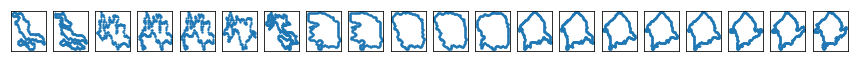

In [9]:
path = '/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/line107340.txt'
if os.name == "nt":
    path = 'E:/line107340.txt'
plotContourFromOriginalFile(path,limit_amount=20, add_milk=False)

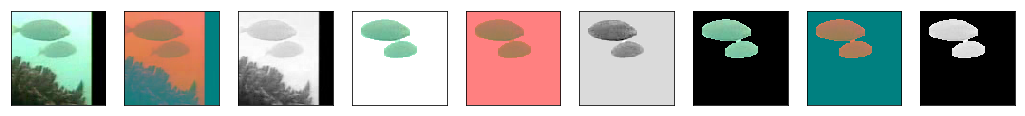

In [10]:
picker = 177
showTransformedImage(picker, clip, hasContour, contour)

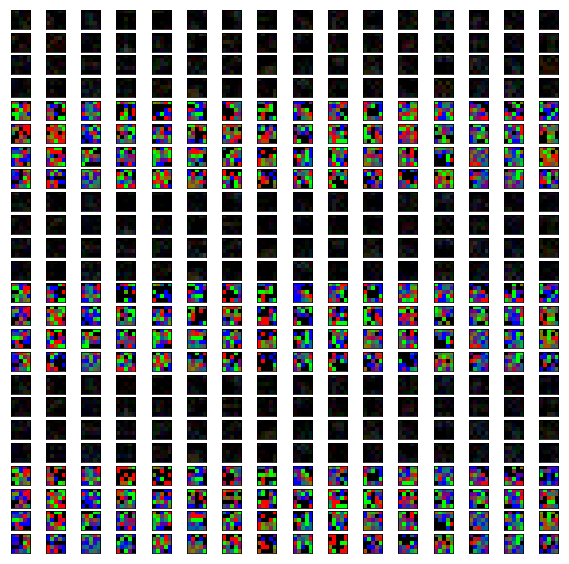

In [11]:
printCNNweight()

In [12]:
printCameras()

37,1,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
38,3,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
39,4,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
40,1,'HoBiHu','3.6mm F1.8 1/3 inches CCD',0,5
41,2,'HoBiHu','3.6mm F1.8 1/3 inches CCD',0,5
42,2,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
43,3,'HoBiHu','3.6mm F1.8 1/3 inches CCD',0,5
44,1,'LanYu','3.6mm Iris:auto 1/3 inches CCD; white LED night sight',0,15
46,2,'LanYu','3.6mm Iris:auto 1/3 inches CCD; white LED night sight',0,15


In [13]:
movs = loadMovids()
time = datetime.now()
for i in range(10):
    __, clip2, __, __, __, __ = loadVideo(movs[i],print_info=False,print_image=False,print_time=True)
    print("Checked Video: {0}  ID: {1}, took: {2}".format(i, movs[i][0],datetime.now()-time), end='\r')

In [14]:
for i, item in enumerate(movs):
    if not(item[0][:2] == "00"):
        print(i)
        break
print(movs[i-1])
print(movs[i])

1584
['00f65fa25502674e59d8ae8bb44ff161#201009201420' '41' '0']
['01afaa3b9607e7b4f34a790e440e3d8e#201101121200' '46' '1']


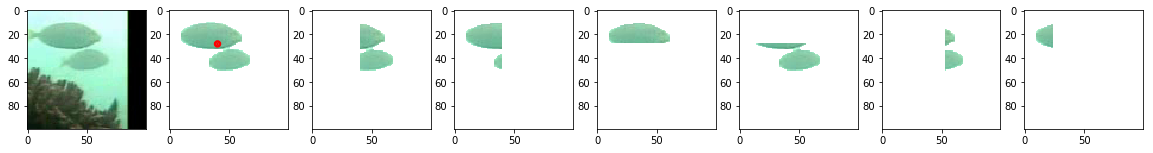

In [3]:
picker = 6
picker2 = 177
printSeperateFish(picker,picker2)

# Windows Test Code below, cuz no library loves windows.

In [ ]:
if os.name == "nt":    
    import matlab.engine
    eng = matlab.engine.start_matlab()
    eng.addpath(r'C:/Users/YuJianmeng/f4k/matt-msc/workspace/f4k/fish_recog',nargout=0)

In [ ]:
if os.name == "nt":
    
    i = 0
    thiscontour = getContour(contour[i])
    mask = np.full(image.shape, 0, dtype=np.uint8)
    cv2.fillPoly(mask, np.array([thiscontour], dtype=np.int32), (255,)*3)
    full_fish = np.array((getMask(getContour(contour[i])).astype(int)*255),dtype="uint8")
    image = clip[i]

    eng.workspace['A'] = image.tolist()
    print(len(image.tolist()))

    (c,d) = eng.generateFeatureFromPython(image.reshape(1,-1).tolist(),full_fish.reshape(1,-1).tolist(),nargout=2)

    print(np.array(c,dtype="double").shape)

In [ ]:
if os.name == "nt":
    eng.exit()
    eng.quit()
    del eng

# Below code only work on DICE. (#JustPyMatlabThings)

In [ ]:
if os.name != "nt":
    import pymatlab
    session = pymatlab.session_factory('matlab -nojvm -nodisplay')
    #session.run('cd /afs/inf.ed.ac.uk/user/s14/s1413557/f4k-2017-msc-master/matt-msc/workspace/f4k/fish_recog')
    session.run('cd C:/Users/YuJianmeng/f4k/matt-msc/workspace/f4k/fish_recog')

In [ ]:
if os.name != "nt":
    time = datetime.now()
    for i in range(4716):
        thiscontour = getContour(contour[i])
        mask = np.full(image.shape, 0, dtype=np.uint8)
        cv2.fillPoly(mask, np.array([thiscontour], dtype=np.int32), (255,)*3)
        full_fish = np.array((getMask(getContour(contour[i])).astype(int)*255),dtype="uint8")
        image = clip[i]
        session.putvalue('A',image)
        session.putvalue('B',full_fish)
        session.run('[C, D] = feature_generateFeatureVector(A,B,false)')
        c = session.getvalue('C')
        d = session.getvalue('D')
        print("Process {0} image took {1}".format(i,datetime.now() - time), end='\r')
    print("Took a total of {0}           ".format(datetime.now() - time) )

In [ ]:
if os.name != "nt":
    del session

---